In [13]:
%matplotlib ipympl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as sp
from mpl_toolkits.mplot3d import Axes3D


In [14]:
#Loading Dataset
dataSet = sp.loadmat('breastw.mat')
y = dataSet['y'] #true labels for checking
#Splitting dataset
Xtraining = dataSet['X'] #in this first run we use the whole dataset
X = Xtraining

In [15]:
y = dataSet['y']
y.shape

(683, 1)

In [16]:
#2D projection model
reduce2D = PCA(n_components = 2)
Xreduced2D = reduce2D.fit_transform(X)

In [17]:
#Creating model
model = KMeans(n_clusters = 2)
#Training model i.e determining cluster centers
model.fit(Xtraining)
centers = model.cluster_centers_
centersreduced2D = reduce2D.fit_transform(centers)
#Applying model to dataSet
kmeansEstimate = model.predict(X)
#Switching cluster labels to match with dataset labels
#kmeansEstimate *= -1
#kmeansEstimate +=1


/!\ executing the above cell multiple times seems to invert false positives/negatives with the true ones

In [18]:
#Separating malignant and benign cells in 2 different arrays
Xbenign2D =  Xreduced2D[np.where(y==0)[0]]
Xmalign2D =  Xreduced2D[np.where(y==1)[0]]

XbenignEst2D =  Xreduced2D[np.where(kmeansEstimate==0)[0]]
XmalignEst2D =  Xreduced2D[np.where(kmeansEstimate==1)[0]]

In [19]:
#Identifying false malignant/benign
kmeansEstimate = np.reshape(kmeansEstimate,(-1,1))
comparison = kmeansEstimate-y
np.shape(kmeansEstimate)
falseMalign = Xreduced2D[np.where(comparison==1)[0]]
falseBenign = Xreduced2D[np.where(comparison==-1)[0]]

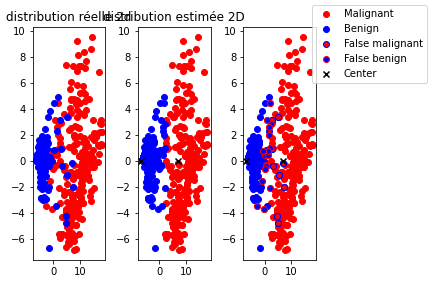

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
ax1.scatter(Xmalign2D[:,0],         Xmalign2D[:,1],         c = 'r')
ax1.scatter(Xbenign2D[:,0],         Xbenign2D[:,1],         c = 'blue')
ax1.set_title('distribution réelle 2d')
#
#ax2.scatter(Xreduced2D[:,0], Xreduced2D[:,1], c = kmeansEstimate)
ax2.scatter(XmalignEst2D[:,0],         XmalignEst2D[:,1],         c = 'r')
ax2.scatter(XbenignEst2D[:,0],         XbenignEst2D[:,1],         c = 'blue')
ax2.scatter(centersreduced2D[:,0],centersreduced2D[:,1], c='black', marker = 'x')
ax2.set_title ('distribution estimée 2D')
#
ax3.scatter(Xmalign2D[:,0],         Xmalign2D[:,1],         c = 'r', label = 'Malignant')
ax3.scatter(Xbenign2D[:,0],         Xbenign2D[:,1],         c = 'blue', label = 'Benign')
ax3.scatter(falseMalign[:,0],       falseMalign[:,1],       c = 'red', label = 'False malignant', edgecolors='blue')
ax3.scatter(falseBenign[:,0],       falseBenign[:,1],       c = 'blue', label = 'False benign', edgecolors='red')
ax3.scatter(centersreduced2D[:,0],  centersreduced2D[:,1],  c='black', label = 'Center', marker = 'x')  
#
fig.legend()
ax4.axis('off')
fig.tight_layout()

In [78]:
#generating confusion matrix
kMeansConfusion = confusion_matrix(y,kmeansEstimate)
print(kMeansConfusion)

[[435   9]
 [ 18 221]]


In [ ]:
#ROC curve for kmeans according to Gobert N. Lee and Hiroshi Fujita, http://www.fjt.info.gifu-u.ac.jp/publication/537.pdf
C2 = 
C1 = 
while C2>0
